<a href="https://colab.research.google.com/github/evandrocg/CDM/blob/master/brmalls_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

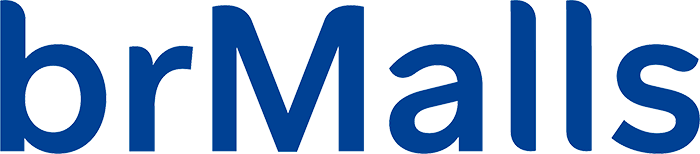

# <font color='Blue'>Gente & Gestão</font>

### <font color='GREY'> Predição de Turnover </font>  




#1° Problema de Negócio 

Todos os meses, novos colaboradores entram e saem da cia e para essa oscilação entre contratações e desligamentos, utilizamos o indicador de **TurnOver**. O objetivo deste modelo é realizar análise preditiva para este indicador.

##### **Fonte dos Dados**

Usaremos uma base de dados intitulada como "**brmalls_ml_colaborador.csv**", originada através da junção de 3 arquivos da **ADP** :
- Base de dados - colaborador
- Movimentação_função
- Movimentação_salarial
 

###### **Arquitetura dos Dados** (AD)

* **total_reajustes**:
* **media_variacao**:
* **menor_variacao**:
* **maior_variacao**',
* total_alocacoes_fisicas','
*total_areas','
*total_cargos','
*total_diretorias','
*total_empresas',
*total_funcoes','
*total_matriculas','
*total_movimentacoes','
*total_subareas','
*alocacao_fisica',
*area', '
*cargo', '
*centro_resultado', '
*codigo', '
*deficiente', '
*diretoria', '
*uf_endereco',
*estado_civil','
*funcao','
*grau_instrucao','
*nro_horas', '
*orientacao_sexual', '
*bolsa_estudos',
*filhos', '
*prazo_contrato', '
*primeiro_emprego','
*raca_cor','
*religiao','
*sexo','
*shopping',
*sub_area','
*vinculo','
*lideranca','
*tempo_empresa','
*idade','
*faixa_salarial','
*situacao_empregado'

# 2° Análise Exploratória dos Dados


In [1]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [28]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um 
dataset = pd.read_csv('/content/colaborador_ml_brmalls.csv', low_memory=False)

In [31]:
# Renomeando o nome das colunas
dataset.columns = ['total_reajustes','media_variacao','menor_variacao','maior_variacao',
                'total_alocacoes_fisicas','total_areas','total_cargos','total_diretorias','total_empresas',
                'total_funcoes','total_matriculas','total_movimentacoes','total_subareas','alocacao_fisica',
                'area', 'cargo', 'centro_resultado', 'codigo', 'deficiente', 'diretoria', 'uf_endereco',
                'estado_civil','funcao','grau_instrucao','nro_horas', 'orientacao_sexual', 'bolsa_estudos',
                'filhos', 'prazo_contrato', 'primeiro_emprego','raca_cor','religiao','sexo','shopping',
                'sub_area','vinculo','lideranca','tempo_empresa','idade','faixa_salarial','situacao_empregado']

In [32]:
# Imprime na Tela os primeiros registros
dataset.head(2)

,total_reajustes,media_variacao,menor_variacao,maior_variacao,total_alocacoes_fisicas,total_areas,total_cargos,total_diretorias,total_empresas,total_funcoes,total_matriculas,total_movimentacoes,total_subareas,alocacao_fisica,area,cargo,centro_resultado,codigo,deficiente,diretoria,uf_endereco,estado_civil,funcao,grau_instrucao,nro_horas,orientacao_sexual,bolsa_estudos,filhos,prazo_contrato,primeiro_emprego,raca_cor,religiao,sexo,shopping,sub_area,vinculo,lideranca,tempo_empresa,idade,faixa_salarial,situacao_empregado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,56,Não,NaN,RJ,Solteiro,15,Educação Superior,220,NaN,NaN,Não,Indeterminado,Não,Branca,NaN,Feminino,METRO SANTA CRUZ,NaN,Trabalhador CLT,Não Líder,> 10,De 20 a 30 anos,NaN,Cessão
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,10071132,39,Não,NaN,RJ,Outros,16,Analfabeto,220,NaN,NaN,Sim,Indeterminado,Não,Branca,NaN,Masculino,GOIÂNIA,NaN,Trabalhador CLT,Não Líder,5-10,De 31 a 40 anos,NaN,Demissão


In [10]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23432 entries, 0 to 23431
Data columns (total 41 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   TotalReajustes                                                                23239 non-null  float64
 1   MediaVariacao                                                                 23239 non-null  float64
 2   MenorVariacao                                                                 23239 non-null  float64
 3   MaiorVariacao                                                                 23239 non-null  float64
 4   TotalAlocaçõesFisicas                                                         23299 non-null  float64
 5   TotalAreas                                                                    23299 non-null  float64
 6   TotalCargos                   

In [11]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
dataset.shape

(23432, 41)

In [12]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

Dataset tem 23432 linhas e 41 colunas.


In [13]:
#Estatísticas descritivas das variáveis numéricas
dataset.describe()

,TotalReajustes,MediaVariacao,MenorVariacao,MaiorVariacao,TotalAlocaçõesFisicas,TotalAreas,TotalCargos,TotalDiretorias,TotalEmpresas,TotalFuncoes,TotalMatriculas,TotalMovimentacoes,TotalSubareas,Cargo - Código,Código,Função - Código,Nro de Horas,Faixa Salarial
count,23239.000000,2.323900e+04,23239.000000,2.323900e+04,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23299.000000,23432.000000,23432.000000,23432.000000,23432.000000,23239.000000
mean,5.651792,2.103122e+04,-3.423667,9.295676e+04,1.173784,1.174299,2.140178,1.109318,1.521868,2.178033,1.563329,2.699644,1.177690,5739.395997,58.978832,5819.992660,210.649539,1.525324
std,6.880236,2.021474e+05,9.380340,7.717587e+05,0.520807,0.498223,1.832526,0.321529,1.028556,1.903586,1.072393,2.744633,0.491422,8262.564053,44.112067,8373.607606,22.104400,1.144572
min,1.000000,-3.057667e+01,-99.310000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,506.000000,16.000000,506.000000,220.000000,1.000000
50%,3.000000,2.886250e+00,0.000000,7.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1074.000000,55.000000,1074.000000,220.000000,1.000000
75%,7.000000,6.207571e+00,0.000000,2.500000e+01,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3079.000000,86.000000,3292.250000,220.000000,1.000000
max,97.000000,4.999950e+06,0.000000,9.999900e+06,6.000000,5.000000,15.000000,3.000000,12.000000,16.000000,10.000000,30.000000,5.000000,20098.000000,212.000000,20849.000000,220.000000,5.000000


In [14]:
# Tabela de Frequência da Variável "Situação do Empregado" - Nossa Classe ou Label ou Target
dataset['Situação do Empregado'].value_counts()


Demissão                          19588
ATIVO                              1877
Cessão                             1812
Férias                               66
Auxilio Doença                       52
SUSPENSÃO CONTRATO DE TRABALHO       17
Licença Maternidade                  10
Licença Não Remunerada                4
Atestado Médico                       3
Recesso/Repouso                       1
Licença Remunerada                    1
Suspensão Contrato de Trabalho        1
Name: Situação do Empregado, dtype: int64

In [ ]:
# Forma adicional de criar a Tab. de Frequência
dataset.Situação do Empregado.value_counts()

In [ ]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco'])

In [ ]:
# Check for missing values
dataset.isna().sum()

In [ ]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = dataset.drop(columns='id_cliente')

In [ ]:
#Printa o dataset na tela
dataset

In [ ]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [ ]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()


In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg é a reta de regressão

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dataset,kind="reg")

# 3° Pré-Processamento dos Dados

In [ ]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [ ]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])

In [ ]:
X

In [ ]:
y

### Separando os dados entre Treino e Teste

In [ ]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [ ]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

In [ ]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [ ]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])

# <font color='Black'> **Aula 2 - Construíndo Máquinas Preditivas** </font>

# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [ ]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]



In [ ]:
#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)



In [ ]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)

In [ ]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

#5° Avaliando a Máquina Preditiva

In [ ]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)

In [ ]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [ ]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [ ]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)



In [ ]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)

In [ ]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

In [ ]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

In [ ]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)

# <font color='Black'> **Aula 3 - Criando uma Aplicação WEB com sua Máquina Preditiva** </font>

# <font color='Blue'>6° Deploy - Implementando a Maquina Preditiva na WEB</font>


### **Passo a Passo** Implementação do Sistema de Classificação de Risco do Cliente:

**1°** Realizar o download da ferramenta "Visual Studio Code" no link abaixo:

https://code.visualstudio.com/

**2°** Instalar a ferramenta: Clicar em "next" e "finish" (simples assim...)

**3°** Criar um diretório "app" no seu Drive "C"

Ex: **C:\app**

**4°** Fazer o Download da pasta "maratona" disponibilizada na página da maratona e via Canal no Telegram.

**5°** Salvar essa pasta dentro do diretório app. 

Ex: **C:\app\maratona** 



**Obs:** dentro da pasta maratona temos 3 arquivos:

1° risco.csv                           - Nossa fonte de dados

2° app_risco.py                        - Nosso Aplicativo web

3° Sistema_Classificação_Risco.ipynb   - Nosso Script de Criação da Máquina Preditiva

**6°** Abrir o VS Code e clicar no menu "File", depois "Open Folder" e vai navegar até o diretório **"C:\app\maratona"**

**7°** Vai no menu "terminal", depois "New Terminal". Perceba que vai abrir, lá embaixo, um terminal de comando, tipo o "CMD" (tela preta) do windows.

**8°** executar os seguinte comandos:

a) pip install plotly     +  tecla enter

b) pip install streamlit  +  tecla enter


9° Instalar o Anaconda

https://www.anaconda.com/products/individual

**10°** Executar o comando de abertura (no terminal do VS Code), do nosso LINDO sistema:

   **streamlit run app_risco.py**

obs: Nosso sistema vai abrir na WEB. Ver no seu navegador web.

# <font color='Black'> **Aula 4 - O GPS: Se tornando um Cientista de Dados** </font>

# Fim

![alt text](https://miro.medium.com/max/625/1*XBWI6eNVLS_70s1qS46E1w.gif)

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>